In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats

In [3]:
df_train=pd.read_csv('melbourne_housing.csv')
df_train

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,3/12/2016,2.5,3067,...,1,1.0,202,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019
1,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,4/2/2016,2.5,3067,...,1,0.0,156,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019
2,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,4/3/2017,2.5,3067,...,2,0.0,134,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019
3,Abbotsford,40 Federation La,3,h,850000,PI,Biggin,4/3/2017,2.5,3067,...,2,1.0,94,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019
4,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,4/6/2016,2.5,3067,...,1,2.0,120,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000,S,Barry,26/08/2017,16.7,3150,...,2,2.0,652,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392
13576,Williamstown,77 Merrett Dr,3,h,1031000,SP,Williams,26/08/2017,6.8,3016,...,2,2.0,333,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380
13577,Williamstown,83 Power St,3,h,1170000,S,Raine,26/08/2017,6.8,3016,...,2,4.0,436,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380
13578,Williamstown,96 Verdon St,4,h,2500000,PI,Sweeney,26/08/2017,6.8,3016,...,1,5.0,866,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380


In [21]:
total=df_train.isnull().sum().sort_values(ascending=False)
percent=(df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data=pd.concat([total,percent],axis=1,keys=['Total','Percent'])
missing_data.head(20)

,Total,Percent
BuildingArea,6450,0.474963
YearBuilt,5375,0.395803
CouncilArea,1369,0.100810
Car,62,0.004566
Suburb,0,0.000000
Bathroom,0,0.000000
Regionname,0,0.000000
Longtitude,0,0.000000
Lattitude,0,0.000000
Landsize,0,0.000000


In [24]:
df_train=df_train.drop(missing_data[missing_data['Total']>1].index,1)
df_train=df_train.drop(df_train.loc[df_train['Car'].isnull()].index)
df_train.isnull().sum().max()

C:\Users\Said\AppData\Local\Temp\ipykernel_17028\1854665639.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_train=df_train.drop(missing_data[missing_data['Total']>1].index,1)


KeyError: "['BuildingArea', 'YearBuilt', 'CouncilArea', 'Car'] not found in axis"

In [25]:
df_train

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Landsize,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,3/12/2016,2.5,3067,2,1,202,-37.79960,144.99840,Northern Metropolitan,4019
1,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,4/2/2016,2.5,3067,2,1,156,-37.80790,144.99340,Northern Metropolitan,4019
2,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,4/3/2017,2.5,3067,3,2,134,-37.80930,144.99440,Northern Metropolitan,4019
3,Abbotsford,40 Federation La,3,h,850000,PI,Biggin,4/3/2017,2.5,3067,3,2,94,-37.79690,144.99690,Northern Metropolitan,4019
4,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,4/6/2016,2.5,3067,3,1,120,-37.80720,144.99410,Northern Metropolitan,4019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000,S,Barry,26/08/2017,16.7,3150,4,2,652,-37.90562,145.16761,South-Eastern Metropolitan,7392
13576,Williamstown,77 Merrett Dr,3,h,1031000,SP,Williams,26/08/2017,6.8,3016,3,2,333,-37.85927,144.87904,Western Metropolitan,6380
13577,Williamstown,83 Power St,3,h,1170000,S,Raine,26/08/2017,6.8,3016,3,2,436,-37.85274,144.88738,Western Metropolitan,6380
13578,Williamstown,96 Verdon St,4,h,2500000,PI,Sweeney,26/08/2017,6.8,3016,4,1,866,-37.85908,144.89299,Western Metropolitan,6380


In [26]:
df_train['Price'].describe()

count    1.358000e+04
mean     1.075684e+06
std      6.393107e+05
min      8.500000e+04
25%      6.500000e+05
50%      9.030000e+05
75%      1.330000e+06
max      9.000000e+06
Name: Price, dtype: float64

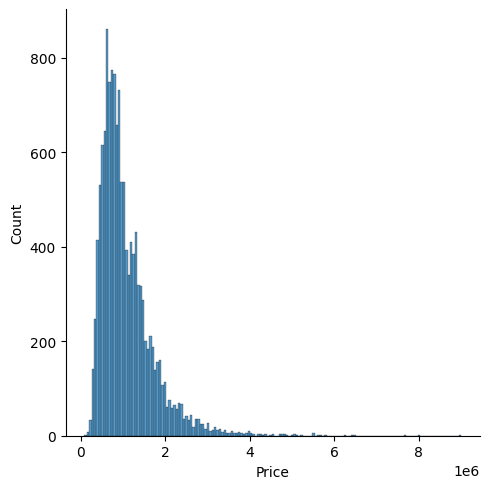

In [34]:
sns.displot(df_train['Price'])

In [4]:
print('Skewness:%f'%df_train['Price'].skew())
print('Kurtosis:%f'%df_train['Price'].kurt())

Skewness:2.239624
Kurtosis:9.874339
